# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


# Ensemble classification and hyperparameter tuning
## Preparations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling

In [2]:
# Read the previously used liver spectroscopy data set
D = pd.read_table('liver-spectroscopy.tab')

# Print the classes
print(D.type.unique())

# Separate the true classes out from the data, into separate variable
types=pd.Categorical(D.type)

['collagen' 'glycogen' 'lipids' 'DNA']


In [10]:
X = D.drop('type', axis=1)

In [11]:
y = types

,1801,1797,1793,1789,1785,1781,1778,1774,1770,1766,...,937,933,929,925,921,917,914,910,906,902
27,0.130,0.131,0.132,0.133,0.133,0.134,0.135,0.137,0.138,0.139,...,0.207,0.207,0.206,0.204,0.202,0.200,0.197,0.194,0.192,0.190
477,0.087,0.086,0.086,0.085,0.084,0.084,0.084,0.086,0.091,0.102,...,0.200,0.200,0.200,0.201,0.202,0.201,0.200,0.197,0.196,0.196
82,0.139,0.140,0.140,0.141,0.141,0.142,0.143,0.145,0.146,0.148,...,0.231,0.231,0.231,0.231,0.230,0.228,0.225,0.223,0.221,0.220
580,0.065,0.065,0.066,0.066,0.066,0.066,0.068,0.071,0.077,0.085,...,0.245,0.246,0.248,0.249,0.250,0.249,0.247,0.244,0.243,0.242
414,0.062,0.063,0.064,0.065,0.066,0.068,0.069,0.073,0.080,0.090,...,0.246,0.246,0.246,0.247,0.246,0.244,0.241,0.238,0.235,0.233
666,0.143,0.144,0.144,0.145,0.146,0.147,0.148,0.149,0.152,0.155,...,0.200,0.200,0.200,0.199,0.197,0.196,0.193,0.191,0.188,0.185
235,0.127,0.127,0.127,0.128,0.128,0.129,0.130,0.131,0.133,0.134,...,0.217,0.218,0.218,0.216,0.213,0.210,0.205,0.201,0.198,0.195
582,0.114,0.115,0.116,0.117,0.117,0.118,0.119,0.122,0.127,0.133,...,0.234,0.235,0.235,0.236,0.236,0.235,0.233,0.231,0.229,0.228
388,0.133,0.134,0.135,0.135,0.134,0.135,0.135,0.138,0.140,0.139,...,0.225,0.225,0.224,0.222,0.219,0.216,0.212,0.207,0.202,0.199
37,0.135,0.135,0.136,0.137,0.137,0.137,0.138,0.140,0.142,0.144,...,0.220,0.221,0.220,0.220,0.219,0.217,0.215,0.212,0.210,0.208


<Axes: >

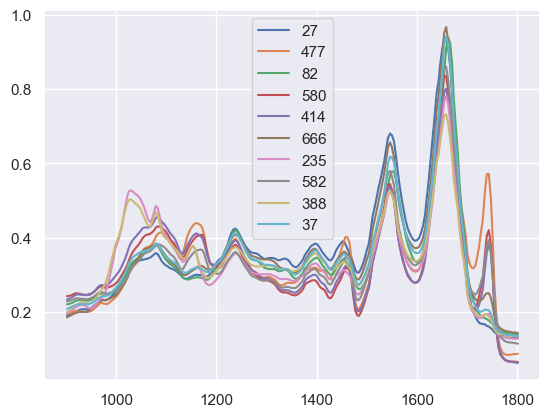

In [3]:
# Parse the column index to integer wavelengths using a lambda-function
wl=D.columns[:-1].map(lambda x: int(float(x)))

# Separate the numerical data from liver spectroscopy to design matrix X
X=D.iloc[:,:-1]

# Assign numerical values to column names, so that the plot is prettier
X.columns=wl

# Print and plot 10 randomly selected samples from the data
sample=X.sample(10)
display(sample)
sample.T.plot()

## Task 1: Apply the extratrees classifier

Import Extratrees classifier from `sklearn.ensemble`, instantiate a classifier with following parameters. 
 - number of estimators = 10
 - maximum depth = 3
 - minimum samples split = 2

When the predictor is trained with these ad-hoc parameters, study its performance with following 5 methods

 1. Styled confusion matrix: `display(pd.crosstab(....))`
 3. Accuracy: `print(metrics.accuracy_score(...))`
 4. More accuracy measures: `print(metrics.classification_report(...))`
 5. Check accuracy with cross validation: `print(cross_val_score(...))` using three-fold cross validation
 6. Calculate the mean of cross validation results over all folds

You can check what recall and f1-score means from SKlearn documentation, page [Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

You can import [Extratrees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) Import also [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) from sklearn since it contains all important classifier metrices. And import cross_val_score from [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| classifier, estimator | `est` |
| Accuracy | `accuracy` |
| Cross val accuracy | `cv_accuracy` |
| Confusion matrix, made with crosstab | `cm` |

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
est = ExtraTreesClassifier(n_estimators=10, max_depth=3, min_samples_split=2)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
est.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=3, n_estimators=10)

In [15]:
y_pred = est.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9251700680272109


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         DNA       1.00      0.45      0.62        20
    collagen       0.79      1.00      0.88        42
    glycogen       1.00      1.00      1.00        47
      lipids       1.00      1.00      1.00        38

    accuracy                           0.93       147
   macro avg       0.95      0.86      0.88       147
weighted avg       0.94      0.93      0.92       147



In [20]:
cv_scores = cross_val_score(est, X_train, y_train, cv=3)
cv_accuracy = np.mean(cv_scores)
cv_accuracy

0.9486650806238436

In [22]:
cm = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted'))
cm

Predicted,DNA,collagen,glycogen,lipids
Actual,,,,
DNA,9,11,0,0
collagen,0,42,0,0
glycogen,0,0,47,0
lipids,0,0,0,38


In [25]:
import sklearn
errorfound=False
require=('est', 'accuracy', 'cv_accuracy', 'cm')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True

if type(est) != sklearn.ensemble.ExtraTreesClassifier:
    print("The classifier is of wrong type")
    errorfound=1
if not errorfound:
    print("No errrors found this far, your code may work :)")


No errrors found this far, your code may work :)


## Task 2, optimize the classifier

Lets try now to find optimal parameters controlling the model (=hyperparameters) for the classifier with grid search CV. Search the parameters:
 - `n_estimators`
 - `max_depth` and
 - `min_samples_split`

Use the previously used extratrees classifier as a starting point

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Tunable parameters structure | `params` |
| Grid search object | `cv_est` |

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Define the tunable parameters structure for the Grid Search
params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 6, 9, 12],
    'min_samples_split': [2, 5, 10]
}

In [29]:
cv_est = GridSearchCV(est, param_grid=params, cv=3)
cv_est.fit(X_train, y_train)  # Assuming X, y are your features and labels

# Get the best parameters
best_params = cv_est.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 50}


In [30]:
errorfound=False
require=('params', 'cv_est')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        

## Task 3

Having trained your estimator, check what where the optimal parameters, and compare the CV-accuracy with the previous model and plot the confusion matrix with crosstab as well. Did it improve?

Notice that you will find the optimised estimator as `cv_est.best_estimator_`, and you can see all its parameters with `est_opt.get_params()`.

Name your variables according to the following table, in order to make the autograder tests to work:

| Variable | Name |
| -------- | ------|
| Optimal, tuned predictor | `est_opt` |
| Cross validation accuracy | `cv_opt` |
| Confusion matrix  | `cm_opt` |

In [32]:
est_opt = cv_est.best_estimator_
best_params = est_opt.get_params()

In [33]:
cv_scores_opt = cross_val_score(est_opt, X_train, y_train, cv=3)
cv_opt = np.mean(cv_scores_opt)
y_pred_opt = est_opt.predict(X_test)

In [36]:
cv_opt

0.9725967045554674

In [35]:
cm_opt = pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred_opt, name='Predicted'))

In [37]:
cm_opt

Predicted,DNA,collagen,glycogen,lipids
Actual,,,,
DNA,18,2,0,0
collagen,0,42,0,0
glycogen,0,0,47,0
lipids,0,0,0,38


In [39]:
errorfound=False
require=('est_opt', 'cv_opt', 'cm_opt')
for var in require:
    if var not in globals():
        print(var, "not found! Please define it.")
        errorfound=True
        